# Demo

Demonstrate `httm` image transformations.

## Getting Started

### Importing `matplotlib`

To start, we will import `matplotlib` and increase the figure size so we can reasonably see artifacts in various FITS images we are going to be looking at.

In [1]:
%matplotlib inline
%config InlineBackend.figure_format = 'png'

In [2]:
import matplotlib
matplotlib.rcParams['figure.figsize'] = (8, 8)

In [3]:
import numpy
from httm.fits_utilities.raw_fits import raw_converter_from_fits

raw_data = raw_converter_from_fits('fits_data/raw_fits/spot50_raw.fits')

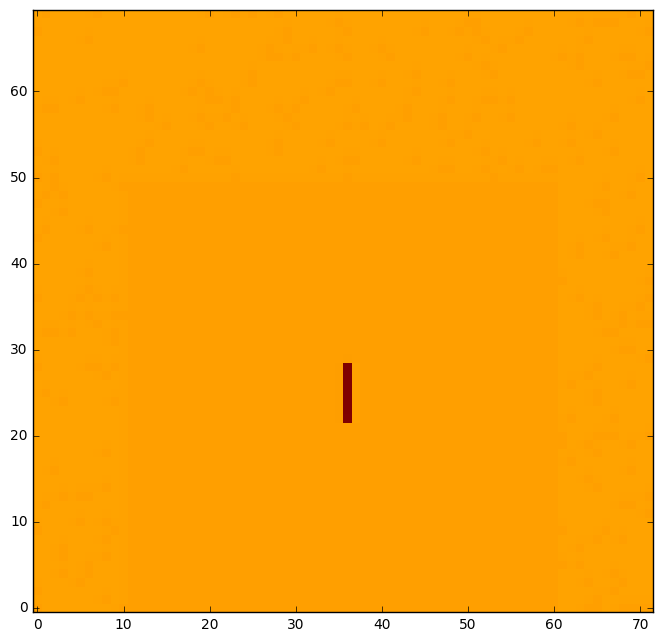

In [4]:
matplotlib.pyplot.imshow(numpy.log10(raw_data.slices[0].pixels-5099), clim=(0,4),interpolation='none')
matplotlib.pyplot.gca().invert_yaxis()

In [4]:
from httm.transformations.raw_converters_to_calibrated import convert_adu_to_electrons

In [5]:
electrons = convert_adu_to_electrons(raw_data)

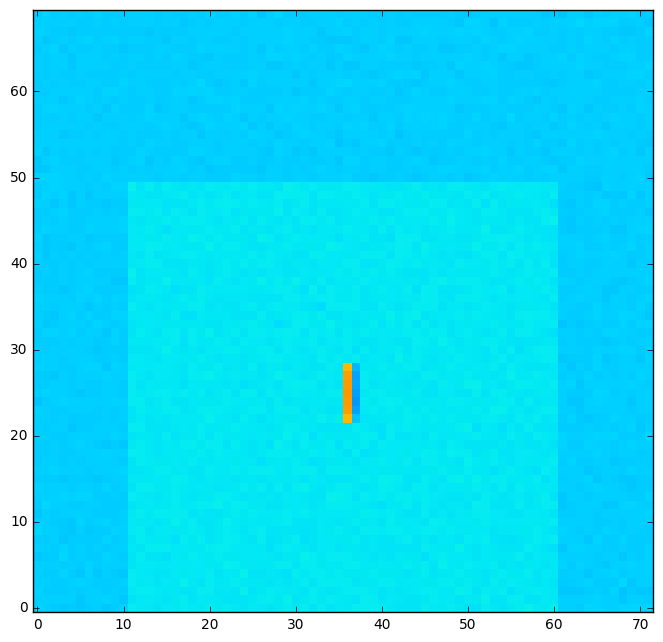

In [7]:
matplotlib.pyplot.imshow(numpy.log10(electrons.slices[0].pixels-32800), clim=(0,7),interpolation='none')
matplotlib.pyplot.gca().invert_yaxis()

In [6]:
from httm.transformations.raw_converters_to_calibrated import remove_baseline, remove_undershoot, remove_smear, remove_start_of_line_ringing

In [7]:
baseless = remove_baseline(electrons)

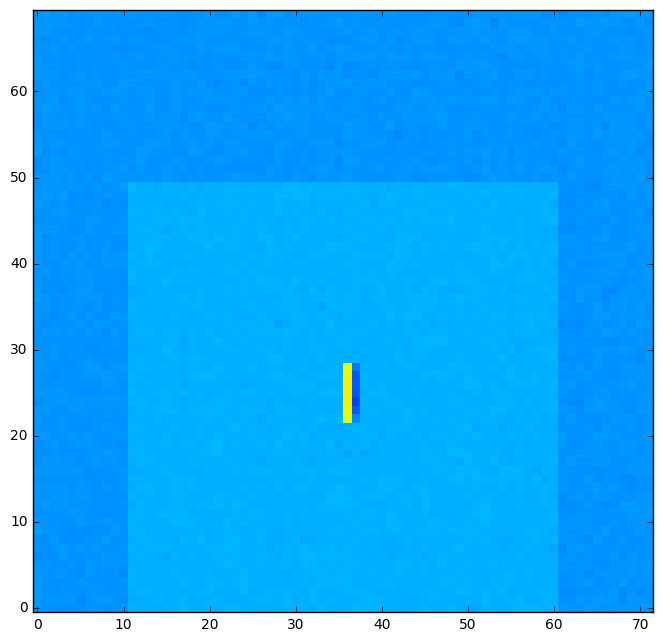

In [16]:
matplotlib.pyplot.imshow(numpy.log10(baseless.slices[0].pixels+150), clim=(0,8),interpolation='none')
matplotlib.pyplot.gca().invert_yaxis()

In [8]:
no_under = remove_undershoot(baseless)

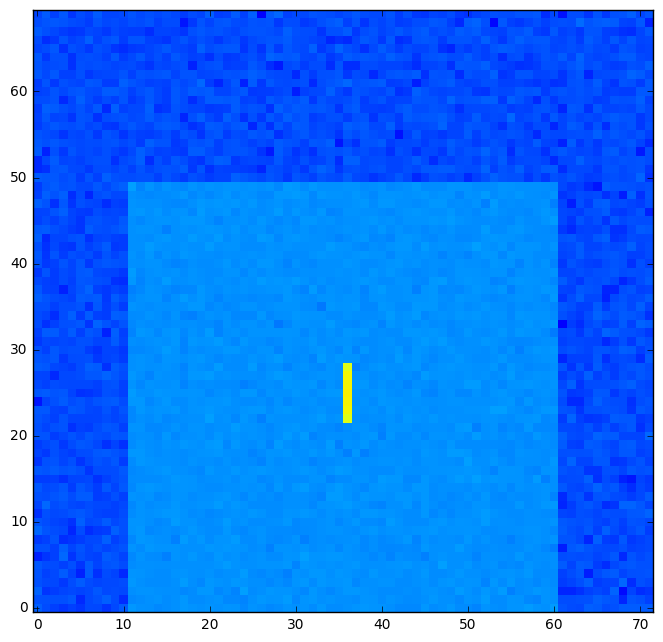

In [10]:
matplotlib.pyplot.imshow(numpy.log10(no_under.slices[0].pixels+40), clim=(0,8),interpolation='none')
matplotlib.pyplot.gca().invert_yaxis()

In [11]:
no_smear=remove_smear(no_under)

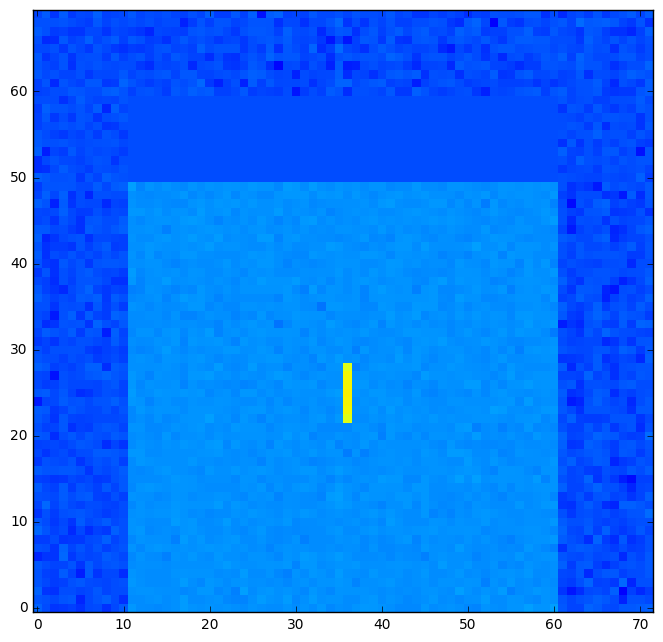

In [12]:
matplotlib.pyplot.imshow(numpy.log10(no_smear.slices[0].pixels+40), clim=(0,8),interpolation='none')
matplotlib.pyplot.gca().invert_yaxis()

In [13]:
no_solr = remove_start_of_line_ringing(no_under)

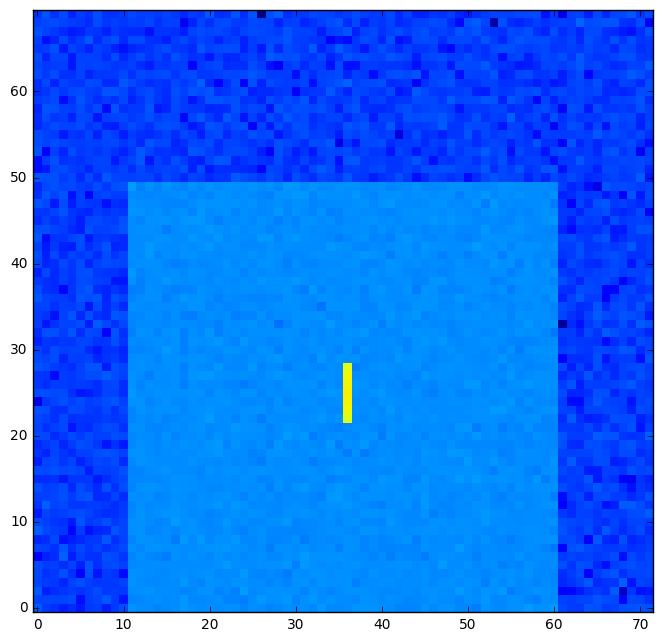

In [15]:
matplotlib.pyplot.imshow(numpy.log10(no_solr.slices[0].pixels+41), clim=(0,8),interpolation='none')
matplotlib.pyplot.gca().invert_yaxis()